# Room Occupancy Estimation

## Introduction

The advent of Internet of Things (IoT) technologies has revolutionized smart building systems by enabling efficient management of resources and occupancy estimation. Predicting room occupancy using sensor data is an essential step in creating sustainable and energy-efficient solutions for modern spaces.

In this project, we utilize the Room Occupancy Estimation Dataset, which contains sensor data collected from various environmental factors such as temperature, humidity, light intensity, and CO2 levels. By analyzing these features, we aim to develop a robust machine learning model to predict whether a room is occupied or not. The results of this study can have practical applications in energy management, HVAC systems optimization, and smart building automation.

## Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

## Load the Dataset

In [7]:
data = pd.read_csv("Downloads/Occupancy_Estimation.csv")
dt = pd.DataFrame(data)
dt.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [8]:
print(f'The Shape of the data is: {dt.shape}')

The Shape of the data is: (10129, 19)


In [9]:
dt.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.0,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.0,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.0,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.0,0,0,0
10128,2018/01/11,09:00:09,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.06,0.08,345,0.0,0,0,0


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [11]:
print('The Summary Statistics of the dataset:')
dt.describe()

The Summary Statistics of the dataset:


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [12]:
print('The number of missing values is:')
dt.isnull().sum().sum()

The number of missing values is:


0

In [13]:
print(f'The number of duplicated data: {dt.duplicated().sum()}')

The number of duplicated data: 0


## Exploratory Data Analysis (EDA)

In [15]:
print("\nColumn Names:")
print(dt.columns)


Column Names:
Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [16]:
df = dt.drop(['Date', 'Time'], axis=1, errors='ignore')
print("\nColumns after dropping unnecessary ones:")
print(df.columns)


Columns after dropping unnecessary ones:
Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')


#### Visualizing Feature Distributions

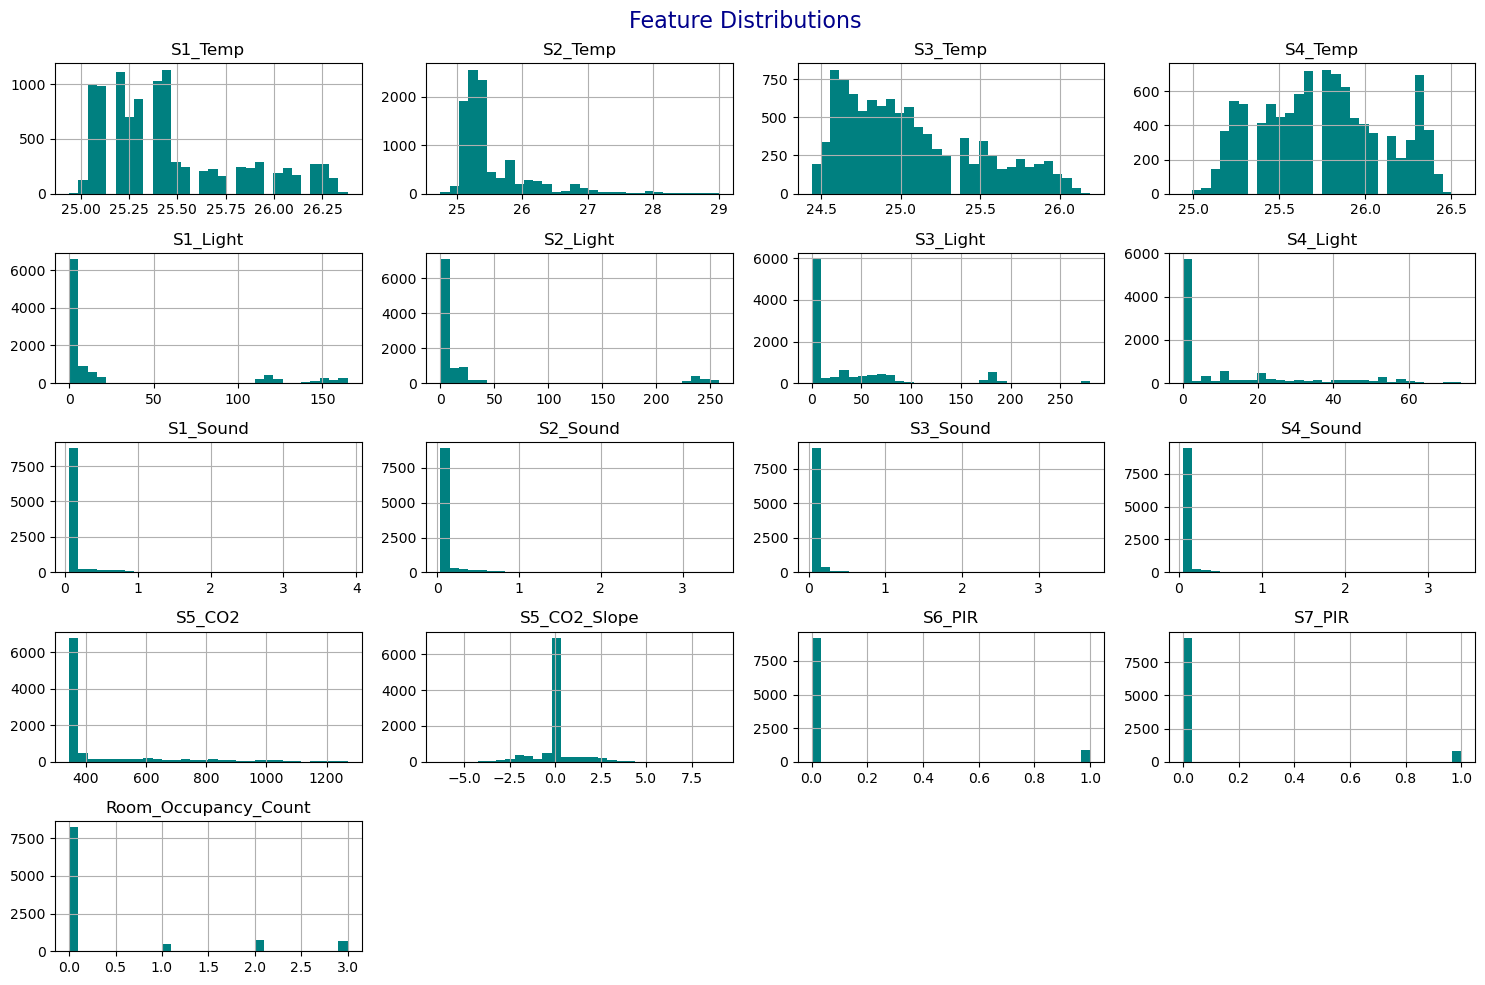

In [18]:
df.hist(bins = 30,figsize = (15,10),color = 'teal')
plt.suptitle("Feature Distributions",fontsize = 16,color = 'Darkblue')
plt.tight_layout()
plt.show()

#### Boxplots for detecting outliers

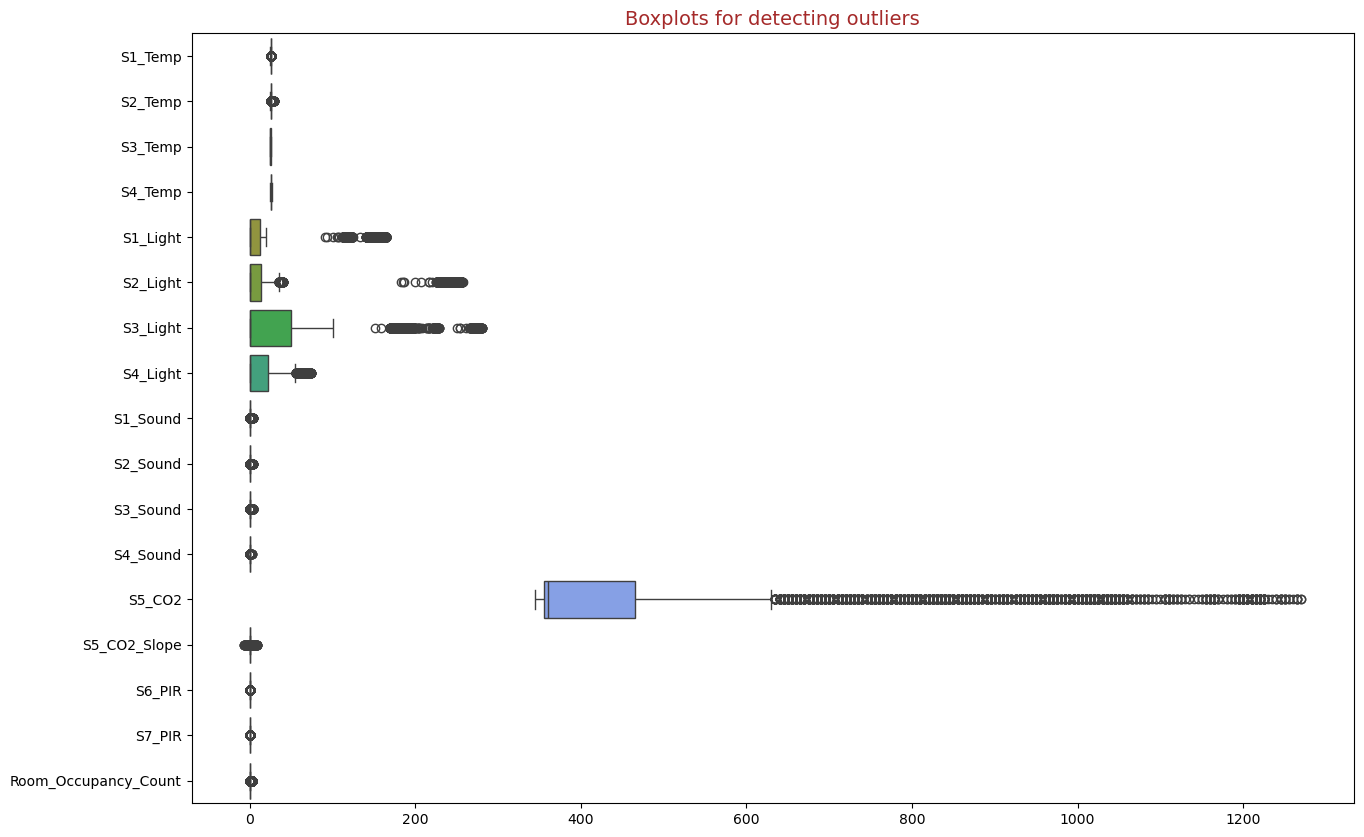

In [20]:
plt.figure(figsize = (15,10))
sns.boxplot(data=df,orient = 'h')
plt.title("Boxplots for detecting outliers",fontsize = 14, color = 'brown')
plt.show()

####  Analyzing Correlations

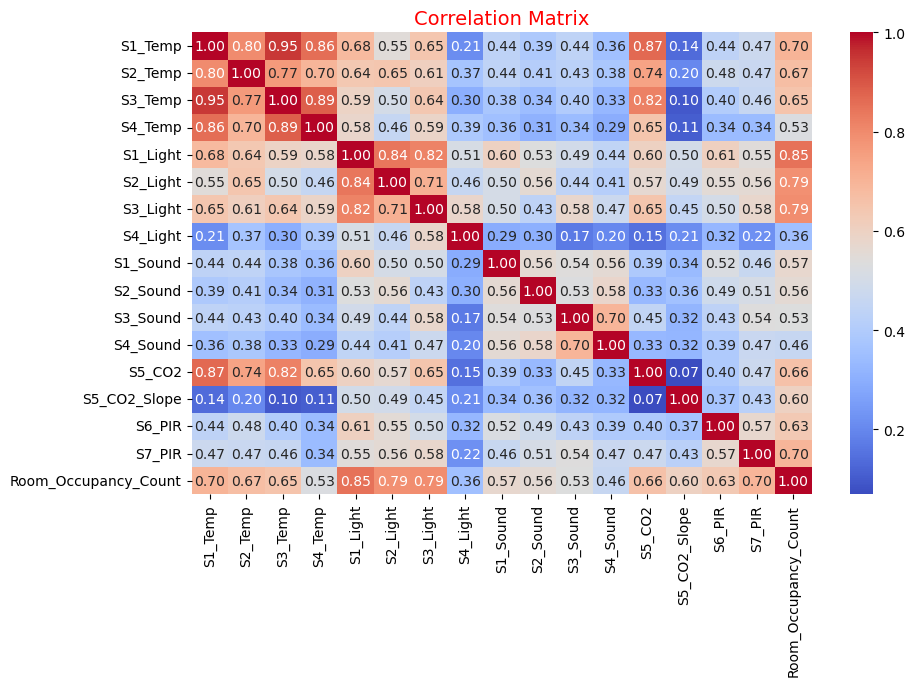

In [22]:
corr = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True,fmt = '.2f',cmap = "coolwarm",cbar = True)
plt.title("Correlation Matrix", fontsize=14,color = 'red')
plt.show()

#### Visualizing Class Distribution of Target Variable

In [24]:
print("Class Distribution of Target Variable:")
target = df['Room_Occupancy_Count'].value_counts()
target

Class Distribution of Target Variable:


Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

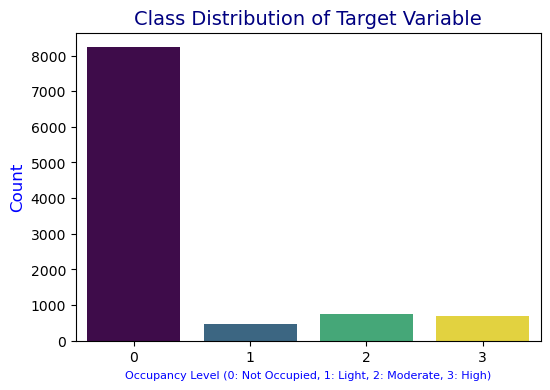

In [25]:
plt.figure(figsize = (6,4))
sns.barplot(x=target.index, y=target.values, palette="viridis",hue=target.index,legend = False)
plt.title("Class Distribution of Target Variable", fontsize=14,color='navy')
plt.xlabel("Occupancy Level (0: Not Occupied, 1: Light, 2: Moderate, 3: High)",fontsize=8,color='blue')
plt.ylabel("Count",fontsize=12,color='blue')
plt.show()

#### Display the top 10 features most correlated with the target

In [27]:
correlation_with_target = df.corr()['Room_Occupancy_Count'].sort_values(ascending=False)

print("Top 10 Features Correlated with Room Occupancy:")
print(correlation_with_target.head(10))

Top 10 Features Correlated with Room Occupancy:
Room_Occupancy_Count    1.000000
S1_Light                0.849058
S3_Light                0.793081
S2_Light                0.788764
S1_Temp                 0.700868
S7_PIR                  0.695138
S2_Temp                 0.671263
S5_CO2                  0.660144
S3_Temp                 0.652047
S6_PIR                  0.633133
Name: Room_Occupancy_Count, dtype: float64


#### Correlation with target

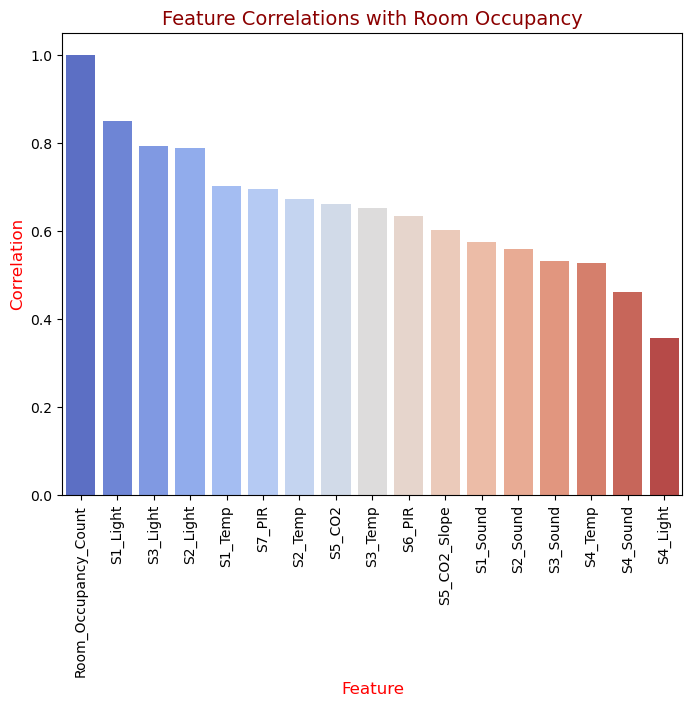

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x =correlation_with_target.index, hue=correlation_with_target.index, y=correlation_with_target.values, palette="coolwarm",legend = False)
plt.title("Feature Correlations with Room Occupancy", fontsize=14,color = 'darkred')
plt.xlabel("Feature",fontsize = 12,color = 'red')
plt.ylabel("Correlation",fontsize = 12,color = 'red')
plt.xticks(rotation=90)
plt.show()

### Handling the outliers

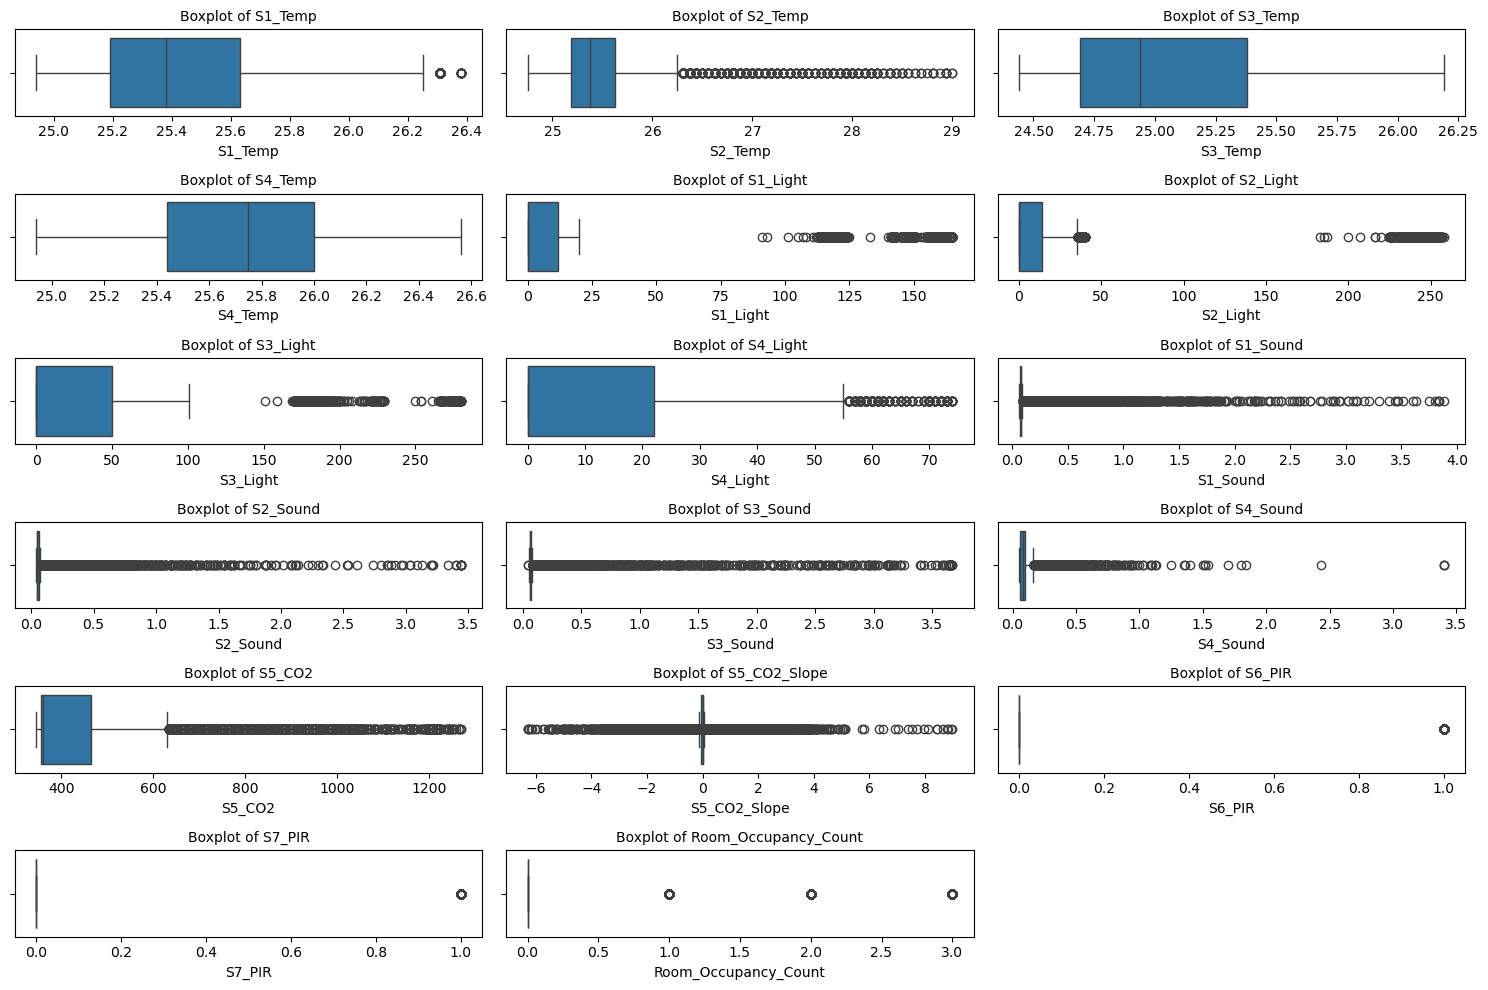

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot((len(df.columns) + 2) // 3, 3, i + 1)  
    sns.boxplot(x=df[col])  
    plt.title(f'Boxplot of {col}',fontsize = 10)
plt.tight_layout()
plt.show()

In [32]:
df1 = df.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

In [33]:
df1.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,25.06,25.06,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,25.06,25.06,24.56,25.44,121,33,53,40,0.72,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.06,25.06,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.06,25.06,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.06,25.06,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [34]:
df1.shape

(10129, 17)

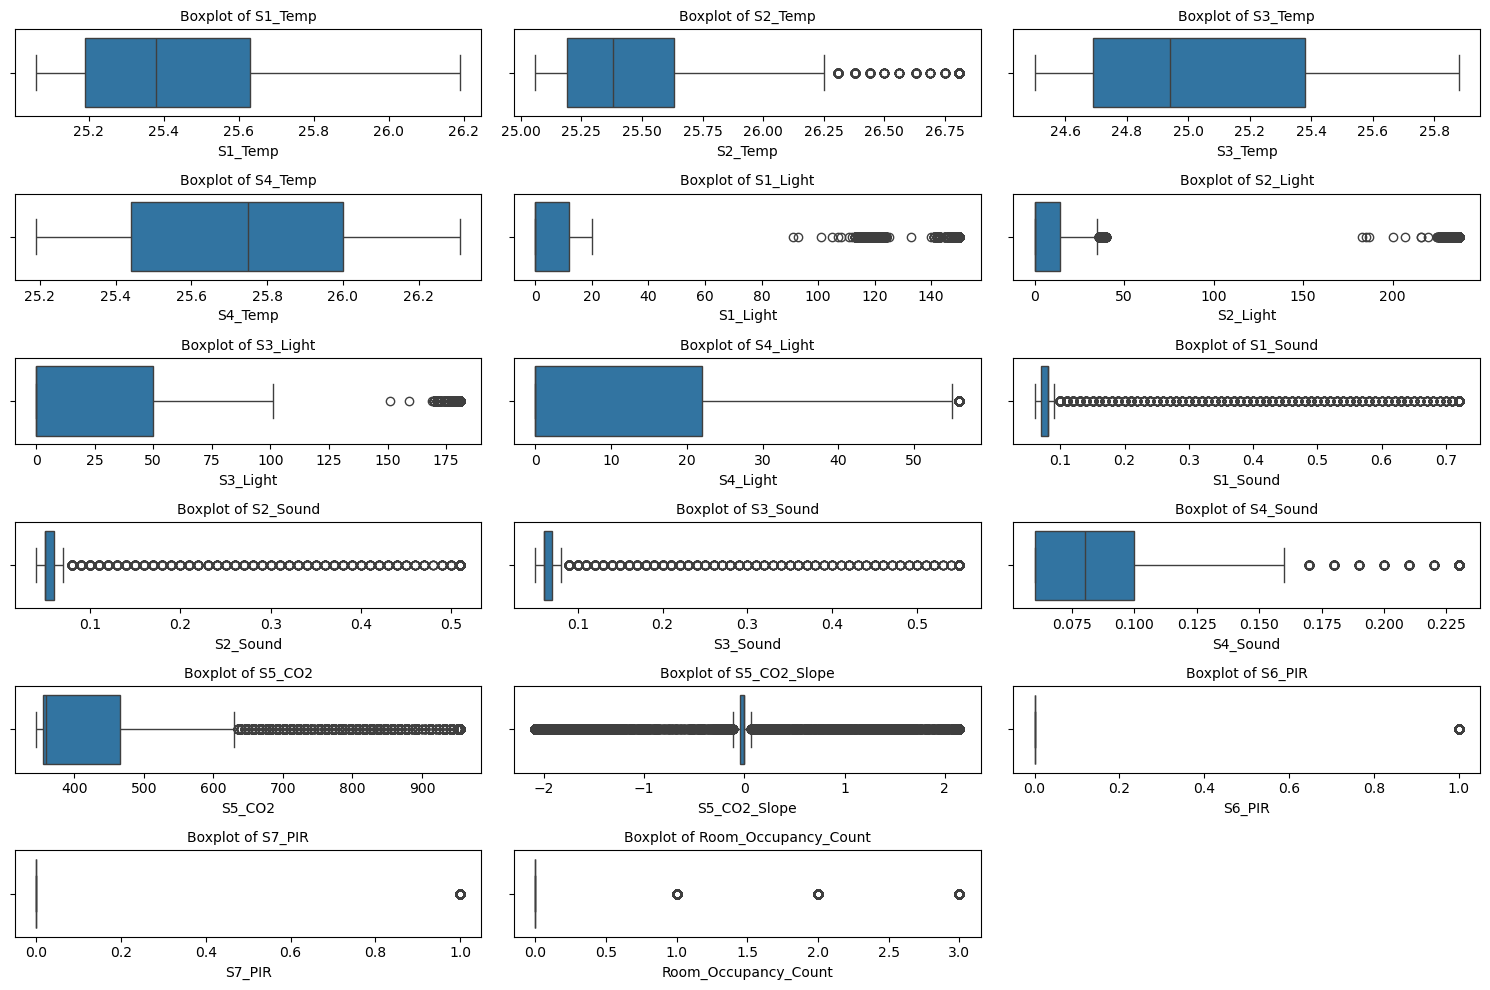

In [35]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1.columns):
    plt.subplot((len(df1.columns) + 2) // 3, 3, i + 1)  
    sns.boxplot(x=df1[col])  
    plt.title(f'Boxplot of {col}',fontsize = 10)
plt.tight_layout()
plt.show()

In [84]:
skewness = df1.skew()
print("Skewness:")
skewness

Skewness:


S1_Temp                 0.899270
S2_Temp                 1.514658
S3_Temp                 0.572813
S4_Temp                 0.098174
S1_Light                1.795221
S2_Light                2.817636
S3_Light                1.836163
S4_Light                1.242749
S1_Sound                2.605795
S2_Sound                2.760291
S3_Sound                3.027793
S4_Sound                2.285896
S5_CO2                  1.715803
S5_CO2_Slope            0.034607
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    2.057635
dtype: float64

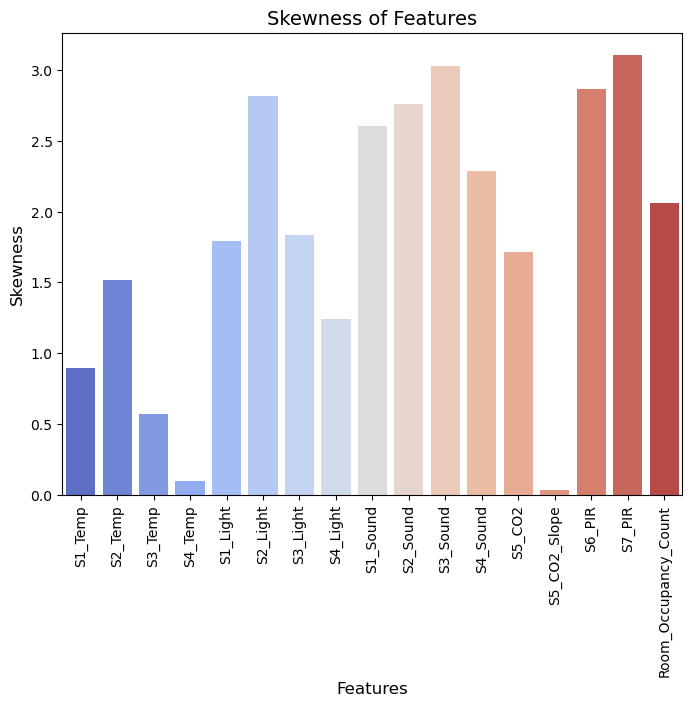

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='coolwarm',hue =skewness.index,legend = False)
plt.title('Skewness of Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Feature Selection and Scaling

In [37]:
X = df1.drop("Room_Occupancy_Count", axis=1) 
y = df1["Room_Occupancy_Count"]

In [38]:
selector = SelectKBest(score_func=f_classif, k=10)  
X_new = selector.fit_transform(X,y)

feature_score = pd.DataFrame({"Features":X.columns,"score":selector.scores_}).sort_values(by = 'score',ascending = False)
feature_score

,Features,score
4,S1_Light,23307.088763
6,S3_Light,6256.386799
5,S2_Light,5928.670796
9,S2_Sound,5834.559059
8,S1_Sound,5115.353419
10,S3_Sound,4528.680730
0,S1_Temp,3408.565868
15,S7_PIR,3392.170690
1,S2_Temp,2785.074300
12,S5_CO2,2688.440747


In [39]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['S1_Temp', 'S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound',
       'S2_Sound', 'S3_Sound', 'S5_CO2', 'S7_PIR'],
      dtype='object')


In [40]:
X_selected = X[selected_features]
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [43]:
print("Shape of X_resampled",X_resampled.shape)
print("Shape of y_resampled",y_resampled.shape)

Shape of X_resampled (26436, 10)
Shape of y_resampled (26436,)


In [44]:
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
Room_Occupancy_Count
0    6609
3    6609
1    6609
2    6609
Name: count, dtype: int64
